1. [프로그램 3-1 (c)]를 20개 샘플을 랜덤하게 선택하고 특징 값을 랜덤하게 5% 에서 변형해 테스
트 집합을 구성하도록 확장하시오. 이때 테스트 집합에 대한 예측을 수행하고 정확률을 측정하시
오. 

In [67]:
from sklearn import datasets, svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import random


d = datasets.load_iris()

x = d.data
y = d.target

x1, x_train, y1, y_train = train_test_split(x, y, test_size = 0.13, shuffle = True, stratify = y, random_state = 123)

print(x_train)
print("새로운 샘플의 부류는 ", y_train)
print()

x_test = x_train[:]

for i in range(len(x_train)):
  num = random.randint(95, 105)
  for j in range(4):
    x_test[i][j] = x_train[i][j] * num/100

s = svm.SVC(gamma = 0.1, C = 10)
s.fit(x_train, y_train)
y_test = s.predict(x_test)

new_index = []
for i in range(len(y_train)):
  if y_train[i] != y_test[i]:
    new_index.append(i)

print("new random sample index : ", new_index)
print(x_test)
print("변형된 샘플의 부류는 ",y_test)
print()
print("정확률은 : ", (len(y_train) - len(new_index))/len(y_train) * 100, "%" )

[[6.7 3.1 4.4 1.4]
 [6.1 3.  4.9 1.8]
 [7.7 3.  6.1 2.3]
 [4.4 3.  1.3 0.2]
 [6.2 2.2 4.5 1.5]
 [6.7 3.1 4.7 1.5]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.5 0.3]
 [5.  2.3 3.3 1. ]
 [4.7 3.2 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.3 2.5 5.  1.9]
 [5.2 3.4 1.4 0.2]
 [6.7 3.  5.  1.7]
 [5.1 3.5 1.4 0.3]
 [5.5 2.4 3.8 1.1]
 [4.9 3.1 1.5 0.2]
 [5.6 2.7 4.2 1.3]]
새로운 샘플의 부류는  [1 2 2 0 1 1 2 2 2 0 1 0 2 2 0 1 0 1 0 1]

new random sample index :  [15]
[[6.633 3.069 4.356 1.386]
 [6.405 3.15  5.145 1.89 ]
 [7.623 2.97  6.039 2.277]
 [4.312 2.94  1.274 0.196]
 [5.89  2.09  4.275 1.425]
 [6.7   3.1   4.7   1.5  ]
 [6.305 3.104 4.947 1.94 ]
 [6.633 3.267 5.643 2.475]
 [6.18  3.09  4.944 1.854]
 [5.151 3.838 1.515 0.303]
 [5.2   2.392 3.432 1.04 ]
 [4.606 3.136 1.274 0.196]
 [7.7   3.8   6.7   2.2  ]
 [6.426 2.55  5.1   1.938]
 [4.992 3.264 1.344 0.192]
 [6.968 3.12  5.2   1.768]
 [5.202 3.57  1.428 0.306]
 [5.28  2.304 3.648 1.056]
 [4.949 3.131 1.515 0.202]
 [5.488 2.646 4.11

2. [프로그램 3-2]를 sepal length 특징을 제외하고 3차원 특징 공간을 그리도록 수정하고 데이터
분포에 대한 분석을 제시하시오.

In [68]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df, x = 'sepal_width', y = 'petal_length', z = 'petal_width', color = 'species')
fig.show()

print("sepal width 축은 species간의 중복되는 범위가 많아 데이터 분별력이 낮습니다.")
print()
print("petal length축은 종 간의 분별력이 뛰어납니다. 다만 versicolor종과 virginica종의 몇 개의 샘플이 겹쳐 나타납니다")
print()
print("petal width축 또한 종간의 분별력이 뛰어납니다. 하지만 petal length보다 versicolor종과 virginica종간의 \n중복 범위가 많아 다수의 샘플이 겹쳐 나타납니다. ")

sepal width 축은 species간의 중복되는 범위가 많아 데이터 분별력이 낮습니다.

petal length축은 종 간의 분별력이 뛰어납니다. 다만 versicolor종과 virginica종의 몇 개의 샘플이 겹쳐 나타납니다

petal width축 또한 종간의 분별력이 뛰어납니다. 하지만 petal length보다 versicolor종과 virginica종간의 
중복 범위가 많아 다수의 샘플이 겹쳐 나타납니다. 


3. [프로그램 3-3 (a)]가 0~9부류의 샘플을 하나씩 랜덤하게 뽑아서 그리도록 확장하시오. 

digit dataset 중에서  0 이 있는 index :  [0, 10, 20, 30, 36, 48, 49, 55, 72, 78, 79, 101, 126, 130, 140, 150, 160, 166, 178, 179, 185, 202, 208, 209, 229, 252, 256, 266, 276, 286, 292, 304, 305, 311, 328, 334, 335, 357, 382, 386, 396, 406, 416, 422, 434, 435, 441, 458, 464, 465, 487, 512, 516, 526, 536, 546, 552, 564, 565, 571, 588, 594, 595, 617, 642, 646, 656, 666, 676, 682, 694, 695, 701, 718, 724, 725, 747, 772, 776, 786, 796, 806, 812, 824, 825, 831, 848, 854, 855, 877, 902, 915, 925, 935, 941, 957, 974, 980, 981, 1002, 1025, 1029, 1039, 1049, 1059, 1065, 1077, 1078, 1082, 1099, 1105, 1106, 1128, 1153, 1157, 1167, 1177, 1187, 1193, 1205, 1206, 1212, 1229, 1235, 1236, 1258, 1283, 1287, 1297, 1307, 1317, 1323, 1335, 1336, 1342, 1359, 1365, 1366, 1388, 1413, 1415, 1425, 1435, 1445, 1451, 1463, 1464, 1470, 1487, 1493, 1494, 1516, 1541, 1545, 1555, 1563, 1573, 1579, 1591, 1592, 1598, 1615, 1620, 1642, 1663, 1667, 1677, 1687, 1697, 1703, 1715, 1716, 1722, 1739, 1745, 1746, 1768, 1793]
0 이 들어간

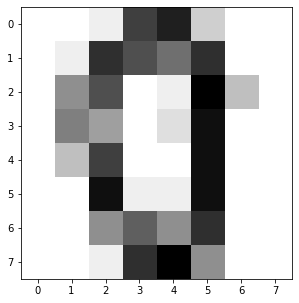

이 숫자는 0 입니다.

digit dataset 중에서  1 이 있는 index :  [1, 11, 21, 42, 47, 56, 70, 80, 85, 90, 93, 99, 107, 131, 141, 151, 172, 177, 186, 200, 210, 215, 218, 221, 227, 235, 257, 267, 277, 298, 303, 312, 326, 336, 341, 346, 349, 355, 363, 387, 397, 407, 428, 433, 442, 456, 466, 471, 476, 479, 485, 493, 517, 527, 537, 558, 563, 572, 586, 596, 601, 606, 609, 615, 623, 647, 657, 667, 688, 693, 702, 716, 726, 731, 736, 739, 745, 753, 777, 787, 797, 818, 823, 832, 846, 856, 861, 866, 869, 875, 883, 906, 916, 926, 947, 952, 958, 972, 982, 987, 991, 994, 1000, 1008, 1030, 1040, 1050, 1071, 1076, 1083, 1097, 1107, 1112, 1117, 1120, 1126, 1134, 1158, 1168, 1178, 1199, 1204, 1213, 1227, 1237, 1242, 1247, 1250, 1256, 1264, 1288, 1298, 1308, 1329, 1334, 1343, 1357, 1367, 1372, 1377, 1380, 1386, 1394, 1416, 1426, 1436, 1457, 1462, 1471, 1485, 1495, 1500, 1505, 1508, 1514, 1522, 1546, 1556, 1564, 1585, 1590, 1599, 1613, 1621, 1626, 1631, 1634, 1640, 1648, 1668, 1678, 1688, 1709, 1714, 1723, 1737, 1747, 175

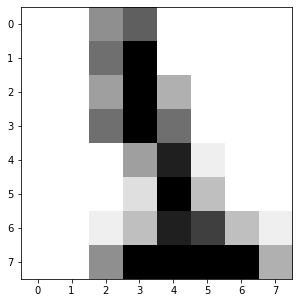

이 숫자는 1 입니다.

digit dataset 중에서  2 이 있는 index :  [2, 12, 22, 50, 51, 54, 57, 75, 77, 84, 113, 115, 116, 132, 142, 152, 180, 181, 184, 187, 205, 207, 214, 241, 243, 244, 258, 268, 278, 306, 307, 310, 313, 331, 333, 340, 369, 371, 372, 388, 398, 408, 436, 437, 440, 443, 461, 463, 470, 499, 501, 502, 518, 528, 538, 566, 567, 570, 573, 591, 593, 600, 629, 631, 632, 648, 658, 668, 696, 697, 700, 703, 721, 723, 730, 759, 761, 762, 778, 788, 798, 826, 827, 830, 833, 851, 853, 860, 889, 891, 892, 907, 917, 927, 953, 956, 959, 977, 979, 986, 1014, 1016, 1017, 1031, 1041, 1051, 1081, 1084, 1102, 1104, 1111, 1140, 1142, 1143, 1159, 1169, 1179, 1207, 1208, 1211, 1214, 1232, 1234, 1241, 1270, 1272, 1273, 1289, 1299, 1309, 1337, 1338, 1341, 1344, 1362, 1364, 1371, 1400, 1402, 1403, 1417, 1427, 1437, 1465, 1466, 1469, 1472, 1490, 1492, 1499, 1528, 1530, 1531, 1547, 1557, 1565, 1593, 1594, 1597, 1600, 1618, 1625, 1654, 1655, 1669, 1679, 1689, 1717, 1718, 1721, 1724, 1742, 1744, 1751, 1780, 1782, 1783]

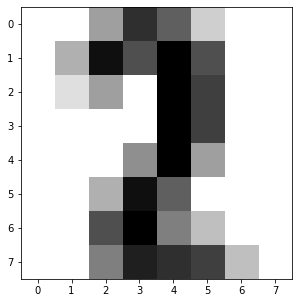

이 숫자는 2 입니다.

digit dataset 중에서  3 이 있는 index :  [3, 13, 23, 45, 59, 60, 62, 63, 83, 89, 91, 98, 103, 133, 143, 153, 175, 189, 190, 192, 193, 213, 217, 219, 226, 231, 259, 269, 279, 301, 315, 316, 318, 319, 339, 345, 347, 354, 359, 385, 389, 399, 409, 431, 445, 446, 448, 449, 469, 475, 477, 484, 489, 519, 529, 539, 561, 575, 576, 578, 579, 599, 605, 607, 614, 619, 649, 659, 669, 691, 705, 706, 708, 709, 729, 735, 737, 744, 749, 779, 789, 799, 821, 835, 836, 838, 839, 859, 865, 867, 874, 879, 908, 918, 928, 950, 961, 962, 964, 965, 985, 990, 992, 999, 1004, 1032, 1042, 1052, 1074, 1086, 1087, 1089, 1090, 1110, 1116, 1118, 1125, 1130, 1160, 1170, 1180, 1202, 1216, 1217, 1219, 1220, 1240, 1246, 1248, 1255, 1260, 1290, 1300, 1310, 1332, 1346, 1347, 1349, 1350, 1370, 1376, 1378, 1385, 1390, 1418, 1428, 1438, 1460, 1474, 1475, 1477, 1478, 1498, 1504, 1506, 1513, 1518, 1548, 1558, 1566, 1588, 1602, 1603, 1605, 1606, 1624, 1630, 1632, 1639, 1644, 1670, 1680, 1690, 1712, 1726, 1727, 1729, 1730,

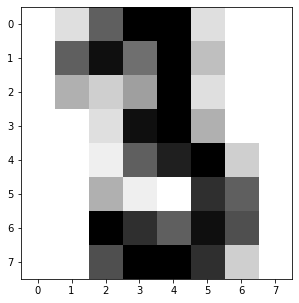

이 숫자는 3 입니다.

digit dataset 중에서  4 이 있는 index :  [4, 14, 24, 41, 64, 68, 87, 97, 100, 110, 111, 121, 124, 134, 144, 154, 171, 194, 198, 225, 228, 238, 239, 247, 250, 260, 270, 280, 297, 320, 324, 343, 353, 356, 366, 367, 377, 380, 390, 400, 410, 427, 450, 454, 473, 483, 486, 496, 497, 507, 510, 520, 530, 540, 557, 580, 584, 603, 613, 616, 626, 627, 637, 640, 650, 660, 670, 687, 710, 714, 733, 743, 746, 756, 757, 767, 770, 780, 790, 800, 817, 840, 844, 863, 873, 876, 886, 887, 897, 900, 909, 919, 929, 946, 966, 970, 988, 998, 1001, 1011, 1012, 1022, 1023, 1033, 1043, 1053, 1070, 1091, 1095, 1114, 1124, 1127, 1137, 1138, 1148, 1151, 1161, 1171, 1181, 1198, 1221, 1225, 1244, 1254, 1257, 1267, 1268, 1278, 1281, 1291, 1301, 1311, 1328, 1351, 1355, 1374, 1384, 1387, 1397, 1398, 1408, 1411, 1419, 1429, 1439, 1456, 1479, 1483, 1502, 1512, 1515, 1525, 1526, 1536, 1539, 1549, 1559, 1567, 1584, 1607, 1611, 1628, 1638, 1641, 1651, 1652, 1660, 1661, 1671, 1681, 1691, 1708, 1731, 1735, 1754, 1764, 1

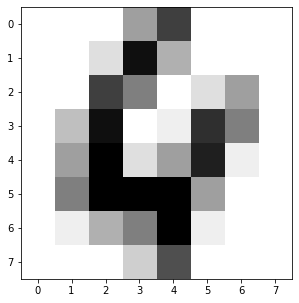

이 숫자는 4 입니다.

digit dataset 중에서  5 이 있는 index :  [5, 15, 25, 32, 33, 35, 46, 71, 74, 102, 109, 117, 120, 135, 145, 155, 162, 163, 165, 176, 201, 204, 230, 237, 245, 246, 261, 271, 281, 288, 289, 291, 302, 327, 330, 358, 365, 373, 376, 391, 401, 411, 418, 419, 421, 432, 457, 460, 488, 495, 503, 506, 521, 531, 541, 548, 549, 551, 562, 587, 590, 618, 625, 633, 636, 651, 661, 671, 678, 679, 681, 692, 717, 720, 748, 755, 763, 766, 781, 791, 801, 808, 809, 811, 822, 847, 850, 878, 885, 893, 896, 910, 920, 930, 937, 938, 940, 951, 973, 976, 1003, 1010, 1018, 1021, 1034, 1044, 1054, 1061, 1062, 1064, 1075, 1098, 1101, 1129, 1136, 1144, 1147, 1162, 1172, 1182, 1189, 1190, 1192, 1203, 1228, 1231, 1259, 1266, 1274, 1277, 1292, 1302, 1312, 1319, 1320, 1322, 1333, 1358, 1361, 1389, 1396, 1404, 1407, 1420, 1430, 1440, 1447, 1448, 1450, 1461, 1486, 1489, 1517, 1524, 1532, 1535, 1550, 1560, 1568, 1575, 1576, 1578, 1589, 1614, 1617, 1643, 1650, 1656, 1659, 1672, 1682, 1692, 1699, 1700, 1702, 1713, 1738

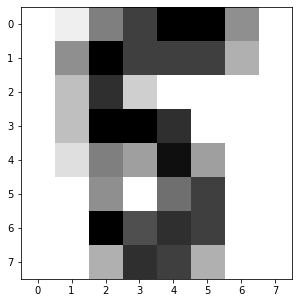

이 숫자는 5 입니다.

digit dataset 중에서  6 이 있는 index :  [6, 16, 26, 34, 58, 65, 66, 67, 82, 88, 95, 104, 106, 136, 146, 156, 164, 188, 195, 196, 197, 212, 223, 232, 234, 262, 272, 282, 290, 314, 321, 322, 323, 338, 344, 351, 360, 362, 392, 402, 412, 420, 444, 451, 452, 453, 468, 474, 481, 490, 492, 522, 532, 542, 550, 574, 581, 582, 583, 598, 604, 611, 620, 622, 652, 662, 672, 680, 704, 711, 712, 713, 728, 734, 741, 750, 752, 782, 792, 802, 810, 834, 841, 842, 843, 858, 864, 871, 880, 882, 911, 921, 931, 939, 960, 967, 968, 969, 984, 989, 996, 1005, 1007, 1035, 1045, 1055, 1063, 1085, 1092, 1093, 1094, 1109, 1115, 1122, 1131, 1133, 1163, 1173, 1183, 1191, 1215, 1222, 1223, 1224, 1239, 1245, 1252, 1261, 1263, 1293, 1303, 1313, 1321, 1345, 1352, 1353, 1354, 1369, 1375, 1382, 1391, 1393, 1421, 1431, 1441, 1449, 1473, 1480, 1481, 1482, 1497, 1503, 1510, 1519, 1521, 1551, 1561, 1569, 1577, 1601, 1608, 1609, 1610, 1623, 1629, 1636, 1645, 1647, 1673, 1683, 1693, 1701, 1725, 1732, 1733, 1734, 1749, 1

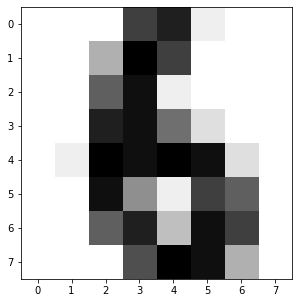

이 숫자는 6 입니다.

digit dataset 중에서  7 이 있는 index :  [7, 17, 27, 43, 44, 52, 61, 81, 86, 94, 108, 112, 118, 137, 147, 157, 173, 174, 182, 191, 211, 216, 222, 236, 240, 263, 273, 283, 299, 300, 308, 317, 337, 342, 350, 364, 368, 374, 393, 403, 413, 429, 430, 438, 447, 467, 472, 480, 494, 498, 504, 523, 533, 543, 559, 560, 568, 577, 597, 602, 610, 624, 628, 634, 653, 663, 673, 689, 690, 698, 707, 727, 732, 740, 754, 758, 764, 783, 793, 803, 819, 820, 828, 837, 857, 862, 870, 884, 888, 894, 912, 922, 932, 948, 949, 954, 963, 983, 995, 1009, 1013, 1019, 1036, 1046, 1056, 1072, 1073, 1079, 1088, 1108, 1113, 1121, 1135, 1139, 1145, 1164, 1174, 1184, 1200, 1201, 1209, 1218, 1238, 1243, 1251, 1265, 1269, 1275, 1294, 1304, 1314, 1330, 1331, 1339, 1348, 1368, 1373, 1381, 1395, 1399, 1405, 1422, 1432, 1442, 1458, 1459, 1467, 1476, 1496, 1501, 1509, 1523, 1527, 1533, 1552, 1570, 1586, 1587, 1595, 1604, 1622, 1627, 1635, 1649, 1653, 1657, 1674, 1684, 1694, 1710, 1711, 1719, 1728, 1748, 1753, 1761, 1775

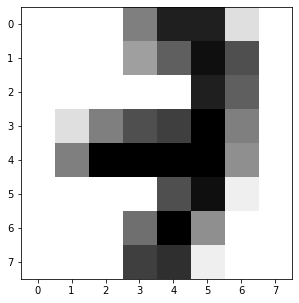

이 숫자는 7 입니다.

digit dataset 중에서  8 이 있는 index :  [8, 18, 28, 38, 40, 53, 76, 96, 114, 122, 123, 127, 129, 138, 148, 158, 168, 170, 183, 206, 224, 242, 248, 249, 253, 255, 264, 274, 284, 294, 296, 309, 332, 352, 370, 378, 379, 383, 394, 404, 414, 424, 426, 439, 462, 482, 500, 508, 509, 513, 515, 524, 534, 544, 554, 556, 569, 592, 612, 630, 638, 639, 643, 645, 654, 664, 674, 684, 686, 699, 722, 742, 760, 768, 769, 773, 775, 784, 794, 804, 814, 816, 829, 852, 872, 890, 898, 899, 903, 905, 913, 923, 933, 943, 945, 955, 978, 997, 1015, 1026, 1028, 1037, 1047, 1057, 1067, 1069, 1080, 1103, 1123, 1141, 1149, 1150, 1154, 1156, 1165, 1175, 1185, 1195, 1197, 1210, 1233, 1253, 1271, 1279, 1280, 1284, 1286, 1295, 1305, 1315, 1325, 1327, 1340, 1363, 1383, 1401, 1409, 1410, 1414, 1423, 1433, 1443, 1453, 1455, 1468, 1491, 1511, 1529, 1537, 1538, 1542, 1544, 1553, 1571, 1581, 1583, 1596, 1619, 1637, 1664, 1666, 1675, 1685, 1695, 1705, 1707, 1720, 1743, 1763, 1781, 1789, 1790, 1794, 1796]
8 이 들어간 index

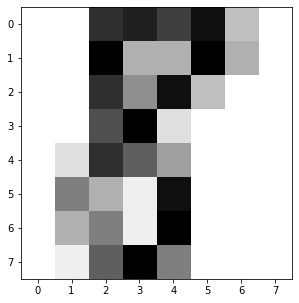

이 숫자는 8 입니다.

digit dataset 중에서  9 이 있는 index :  [9, 19, 29, 31, 37, 39, 69, 73, 92, 105, 119, 125, 128, 139, 149, 159, 161, 167, 169, 199, 203, 220, 233, 251, 254, 265, 275, 285, 287, 293, 295, 325, 329, 348, 361, 375, 381, 384, 395, 405, 415, 417, 423, 425, 455, 459, 478, 491, 505, 511, 514, 525, 535, 545, 547, 553, 555, 585, 589, 608, 621, 635, 641, 644, 655, 665, 675, 677, 683, 685, 715, 719, 738, 751, 765, 771, 774, 785, 795, 805, 807, 813, 815, 845, 849, 868, 881, 895, 901, 904, 914, 924, 934, 936, 942, 944, 971, 975, 993, 1006, 1020, 1024, 1027, 1038, 1048, 1058, 1060, 1066, 1068, 1096, 1100, 1119, 1132, 1146, 1152, 1155, 1166, 1176, 1186, 1188, 1194, 1196, 1226, 1230, 1249, 1262, 1276, 1282, 1285, 1296, 1306, 1316, 1318, 1324, 1326, 1356, 1360, 1379, 1392, 1406, 1412, 1424, 1434, 1444, 1446, 1452, 1454, 1484, 1488, 1507, 1520, 1534, 1540, 1543, 1554, 1562, 1572, 1574, 1580, 1582, 1612, 1616, 1633, 1646, 1658, 1662, 1665, 1676, 1686, 1696, 1698, 1704, 1706, 1736, 1740, 1759, 177

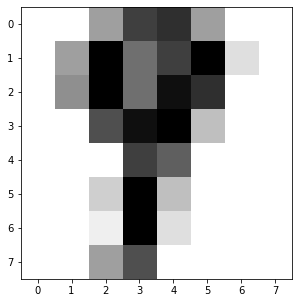

이 숫자는 9 입니다.



In [69]:
digit = datasets.load_digits()
x = digit.data
y = digit.target
globals()['values{}'.format(i)] = [j for j in range(len(y)) if i == y[j]]

for i in range(10):
  globals()['values{}'.format(i)] = [j for j in range(len(y)) if i == y[j]]
  print("digit dataset 중에서 ", i, "이 있는 index : ", globals()['values{}'.format(i)])
  index = random.choice(globals()['values{}'.format(i)])
  print(i,"이 들어간 index 중 하나 선택 : ", index)
  plt.figure(figsize =(5,5))
  plt.imshow(digit.images[index],cmap=plt.cm.gray_r,interpolation = 'nearest')
  plt.show()
  print("이 숫자는", digit.target[index], "입니다.")
  print()


4. [프로그램 3-6]이 k를 5, 6, …, 10으로 변화시키며 k-겹 교차 검증을 수행하도록 확장하시오

In [62]:
s = svm.SVC(gamma = 0.001)
for i in range(5,11):
  print(i,"겹 교차검증")
  accuracies = cross_val_score(s, digit.data, digit.target, cv = i)
  print(accuracies)
  print("정확도(평균)=%0.3f, 표준편차=%0.3f"%(accuracies.mean()*100, accuracies.std()))
  print()

5 겹 교차검증
[0.975      0.95       0.98328691 0.99164345 0.96100279]
정확도(평균)=97.219, 표준편차=0.015

6 겹 교차검증
[0.97       0.98       0.98333333 0.98996656 0.99665552 0.95317726]
정확도(평균)=97.886, 표준편차=0.014

7 겹 교차검증
[0.96498054 0.98054475 0.95719844 0.98054475 0.9922179  0.9921875
 0.9453125 ]
정확도(평균)=97.328, 표준편차=0.017

8 겹 교차검증
[0.96       0.99111111 0.95111111 0.99111111 0.99111111 0.99107143
 0.99107143 0.9375    ]
정확도(평균)=97.551, 표준편차=0.021

9 겹 교차검증
[0.955      0.995      0.98       0.985      0.975      0.995
 0.99497487 0.9798995  0.95979899]
정확도(평균)=97.996, 표준편차=0.014

10 겹 교차검증
[0.95       1.         0.95       0.98333333 0.98888889 0.98888889
 0.99444444 0.99441341 0.96648045 0.96648045]
정확도(평균)=97.829, 표준편차=0.018



5. [프로그램 3-1]이 SVM뿐만 아니라 결정 트리 모델까지 적용하도록 확장하시오. 이때 훈련 집합
을 테스트 집합으로 간주해 SVM과 결정 트리의 정확률을 측정하고 비교하시오. (정확률 구현은
프로그램 3-4를 참고하시오.)

In [63]:
from sklearn.tree import DecisionTreeClassifier

s = svm.SVC(gamma = 0.1, C = 10)
s.fit(d.data, d.target)
res = s.predict(d.data)
correct = [i for i in range(len(res)) if res[i] == d.target[i]]
accuracy = len(correct)/len(res)
print("SVM 사용했을 때 정확률 = ", accuracy*100,"%")

dtc = DecisionTreeClassifier(random_state = 123)
dtc.fit(d.data, d.target)
res2 = dtc.predict(d.data)
correct2 = [i for i in range(len(res)) if res2[i] == d.target[i]]
accuracy2 = len(correct2)/len(res2)
print("Random Forest 사용했을 때 정확률 = ", accuracy2*100,"%")

SVM 사용했을 때 정확률 =  98.66666666666667 %
Random Forest 사용했을 때 정확률 =  100.0 %
